In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

df1 = pd.read_excel("/home/apprenant/american_dream_db/Data/01_raw/data_professionnal_salary_survey.xlsx", skiprows=3)
pd.set_option('max_columns', None)

In [72]:
def boxplot_viz(column_name,size=(10,10), ratio=[5,95]):
    df1.boxplot(column=column_name,figsize=size,
                   whis=ratio, return_type='axes') # We identify outliers values with whis ratio (= 5% top and bottom values)

## Columns selection

In [73]:
df1.head(10)

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,CompanyEmployeesOverall,DatabaseServers,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,NewestVersionInProduction,OldestVersionInProduction,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2020,2020-01-04 18:50:34.328,115000.0,United States,03,Microsoft SQL Server,15,"Microsoft SQL Server, MongoDB, Azure SQL DB (a...",Full time employee,DBA (Production Focus - build & troubleshoot s...,No,5,1 (this is the only company where I've had thi...,2,Not Asked,500,Not Asked,Not Asked,Not Asked,Not Asked,Not Asked,SQL Server 2019,SQL Server 2016,20K-99K (large town),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
1,2020,2020-01-04 10:43:01.821,100000.0,United States,NaN,Other,6,MySQL/MariaDB,Full time employee,"Developer: App code (C#, JS, etc)",No,6,1 (this is the only company where I've had thi...,More than 5,Not Asked,1,Not Asked,Not Asked,Not Asked,Not Asked,Not Asked,informix,informix,1M+ (metropolis),Private business,Not Asked,Prefer not to say,Male,Not Asked,Not Asked,1
2,2020,2020-01-04 09:51:45.885,100000.0,Spain,28046,Microsoft SQL Server,2,MySQL/MariaDB,Full time employee,Other,Yes,3,1 (this is the only company where I've had thi...,1,Not Asked,1,Not Asked,Not Asked,Not Asked,Not Asked,Not Asked,SQL Server 2017,SQL Server 2017,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
3,2020,2020-01-04 01:08:53.605,70000.0,United States,94133,Microsoft SQL Server,3,Microsoft Access,Full time employee,Analyst,No,3,1 (this is the only company where I've had thi...,2,Not Asked,3,Not Asked,Not Asked,Not Asked,Not Asked,Not Asked,SQL Server 2016,SQL Server 2012,1M+ (metropolis),Private business,Not Asked,Change both employers and roles,Male,Not Asked,Not Asked,1
4,2020,2020-01-03 15:28:54.163,110000.0,United States,95354,Oracle,30,"Microsoft SQL Server, Oracle, MySQL/MariaDB, P...",Full time employee,DBA (General - splits time evenly between writ...,No,25,3,None,Not Asked,45,Not Asked,Not Asked,Not Asked,Not Asked,Not Asked,SQL Server 2016,SQL Server 2008R2,100K-299K (city),Non-profit,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
5,2020,2020-01-03 15:06:14.882,79500.0,United States,78727,Oracle,2,NaN,Full time employee,Analyst,No,2,1 (this is the only company where I've had thi...,None,Not Asked,4,Not Asked,Not Asked,Not Asked,Not Asked,Not Asked,Oracle R12,Oracle 11g,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
6,2020,2020-01-03 07:15:50.654,110000.0,United States,14216,Other,4,"Microsoft SQL Server, Oracle, MySQL/MariaDB, S...",Full time employee,DBA (General - splits time evenly between writ...,No,4,1 (this is the only company where I've had thi...,More than 5,Not Asked,500,Not Asked,Not Asked,Not Asked,Not Asked,Not Asked,SQL Server 2016,SQL Server 2008R2,100K-299K (city),Private business,Not Asked,"Stay with the same employer, but change roles",Male,Not Asked,Not Asked,1
7,2020,2020-01-03 06:05:41.312,39000.0,Portugal,1000 Lisboa,Microsoft SQL Server,15,NaN,Full time employee of a consulting/contracting...,"Developer: App code (C#, JS, etc)",Yes,15,1 (this is the only company where I've had thi...,None,Not Asked,4,Not Asked,Not Asked,Not Asked,Not Asked,Not Asked,SQL Server 2016,SQL Server 2000,300K-1M (large city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
8,2020,2020-01-02 23:30:37.902,58000.0,United States,85716,Microsoft SQL Server,1,NaN,Full time employee,"Developer: Business Intelligence (SSRS, PowerB...",No,1,1 (this is the only

In [74]:
df1.columns

Index(['Survey Year', 'Timestamp', 'SalaryUSD', 'Country', 'PostalCode',
       'PrimaryDatabase', 'YearsWithThisDatabase', 'OtherDatabases',
       'EmploymentStatus', 'JobTitle', 'ManageStaff', 'YearsWithThisTypeOfJob',
       'HowManyCompanies', 'OtherPeopleOnYourTeam', 'CompanyEmployeesOverall',
       'DatabaseServers', 'Education', 'EducationIsComputerRelated',
       'Certifications', 'HoursWorkedPerWeek', 'TelecommuteDaysPerWeek',
       'NewestVersionInProduction', 'OldestVersionInProduction',
       'PopulationOfLargestCityWithin20Miles', 'EmploymentSector',
       'LookingForAnotherJob', 'CareerPlansThisYear', 'Gender',
       'OtherJobDuties', 'KindsOfTasksPerformed', 'Counter'],
      dtype='object')

In [75]:
key_cols = [
    'SalaryUSD',
    'Country',
    'PostalCode',
    'JobTitle',
    'EmploymentStatus',
    'ManageStaff',
    'YearsWithThisTypeOfJob',
    'HowManyCompanies',
    'OtherPeopleOnYourTeam',
    'CompanyEmployeesOverall',
    'HoursWorkedPerWeek',
    'PopulationOfLargestCityWithin20Miles',
    'EmploymentSector',
    'LookingForAnotherJob',
    'CareerPlansThisYear',
    'Gender'
]

df1 = df1[key_cols]

In [76]:
# rename all columns
names_cols = {
    'SalaryUSD' : 'salary',
    'Country' : 'location',
    'PostalCode' : 'postal_code',
    'JobTitle' : 'job_title',
    'EmploymentStatus' : 'employment_status',
    'ManageStaff' : 'manage_staff',
    'YearsWithThisTypeOfJob' : 'experience',
    'HowManyCompanies' : 'nb_companies',
    'OtherPeopleOnYourTeam' : 'team_size',
    'CompanyEmployeesOverall' : 'company_employees',
    'HoursWorkedPerWeek' : 'hours_per_week',
    'PopulationOfLargestCityWithin20Miles' : 'largest_city',
    'EmploymentSector' : 'sector',
    'LookingForAnotherJob' : 'lf_job',
    'CareerPlansThisYear' : 'career_plans',
    'Gender' : 'gender'
}

df1 = df1.rename(names_cols, axis=1)

In [77]:
df1.head()

,salary,location,postal_code,job_title,employment_status,manage_staff,experience,nb_companies,team_size,company_employees,hours_per_week,largest_city,sector,lf_job,career_plans,gender
0,115000.0,United States,03,DBA (Production Focus - build & troubleshoot s...,Full time employee,No,5,1 (this is the only company where I've had thi...,2,Not Asked,Not Asked,20K-99K (large town),Private business,Not Asked,"Stay with the same employer, same role",Male
1,100000.0,United States,NaN,"Developer: App code (C#, JS, etc)",Full time employee,No,6,1 (this is the only company where I've had thi...,More than 5,Not Asked,Not Asked,1M+ (metropolis),Private business,Not Asked,Prefer not to say,Male
2,100000.0,Spain,28046,Other,Full time employee,Yes,3,1 (this is the only company where I've had thi...,1,Not Asked,Not Asked,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male
3,70000.0,United States,94133,Analyst,Full time employee,No,3,1 (this is the only company where I've had thi...,2,Not Asked,Not Asked,1M+ (metropolis),Private business,Not Asked,Change both employers and roles,Male
4,110000.0,United States,95354,DBA (General - splits time evenly between writ...,Full time employee,No,25,3,None,Not Asked,Not Asked,100K-299K (city),Non-profit,Not Asked,"Stay with the same employer, same role",Male


## Rows selection

### 1. Remove duplicated rows

In [78]:
df1.duplicated().value_counts()

False    8578
True       49
dtype: int64

In [79]:
df1.drop_duplicates(subset=df1.columns.difference(['Timestamp']), inplace = True)

### 2. Location

In [80]:
df1['location'].unique()

array(['United States', 'Spain', 'Portugal', 'United Kingdom', 'Canada',
       'Netherlands', 'Austria', 'Belgium', 'France', 'Romania',
       'Denmark', 'Israel', 'Australia', 'New Zealand', 'Anguilla',
       'Sweden', 'Turkey', 'India', 'Ireland', 'Germany', 'Saudi Arabia',
       'Russia', 'Norway', 'Ukraine', 'Serbia and Montenegro',
       'Luxembourg', 'Poland', 'Slovakia', 'Costa Rica', 'South Africa',
       'Hungary', 'Brazil', 'Czech Republic', 'Croatia', 'Pakistan',
       'Lithuania', 'Macedonia', 'Italy', 'Switzerland', 'Georgia',
       'Philippines', 'Singapore', 'Mexico', 'Greece', 'Bulgaria',
       'Argentina', 'Slovenia', 'Puerto Rico', 'Swaziland', 'Armenia',
       'Latvia', 'Iceland', 'Indonesia', 'Iran', 'Maldives', 'Taiwan',
       'Uruguay', 'Vanuatu', 'Cayman Islands', 'Colombia', 'Ecuador',
       'Peru', 'Qatar', 'Jersey', 'Finland', 'Guernsey', 'Hong Kong',
       'El Salvador', 'Uganda', 'Guatemala', 'Jordan',
       'United Arab Emirates', 'Malta', 'Be

In [81]:
df1 = df1[df1.location == 'United States']

### 2. Sector

In [82]:
df1['sector'].unique()

array(['Private business', 'Non-profit',
       'Education (K-12, college, university)', 'Local government',
       'Federal government', 'State/province government', 'Student'],
      dtype=object)

In [83]:
df1 = df1[df1.sector != 'Student']
df1.head()

,salary,location,postal_code,job_title,employment_status,manage_staff,experience,nb_companies,team_size,company_employees,hours_per_week,largest_city,sector,lf_job,career_plans,gender
0,115000.0,United States,03,DBA (Production Focus - build & troubleshoot s...,Full time employee,No,5,1 (this is the only company where I've had thi...,2,Not Asked,Not Asked,20K-99K (large town),Private business,Not Asked,"Stay with the same employer, same role",Male
1,100000.0,United States,NaN,"Developer: App code (C#, JS, etc)",Full time employee,No,6,1 (this is the only company where I've had thi...,More than 5,Not Asked,Not Asked,1M+ (metropolis),Private business,Not Asked,Prefer not to say,Male
3,70000.0,United States,94133,Analyst,Full time employee,No,3,1 (this is the only company where I've had thi...,2,Not Asked,Not Asked,1M+ (metropolis),Private business,Not Asked,Change both employers and roles,Male
4,110000.0,United States,95354,DBA (General - splits time evenly between writ...,Full time employee,No,25,3,None,Not Asked,Not Asked,100K-299K (city),Non-profit,Not Asked,"Stay with the same employer, same role",Male
5,79500.0,United States,78727,Analyst,Full time employee,No,2,1 (this is the only company where I've had thi...,None,Not Asked,Not Asked,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male


## Handling outlier errors

### 1. Salary

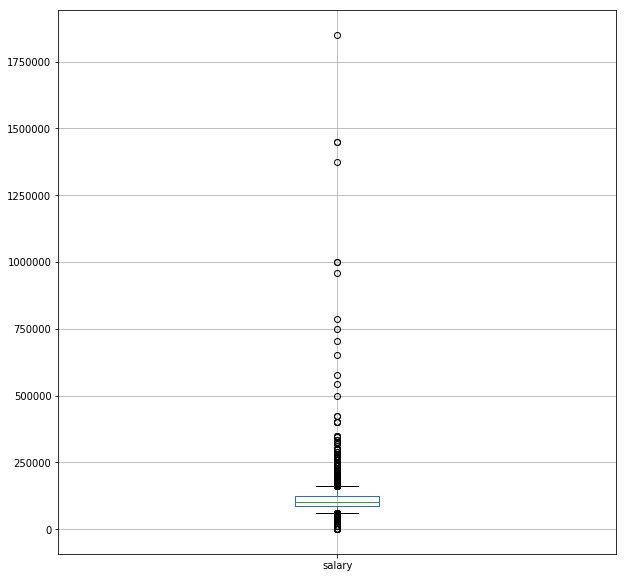

In [84]:
boxplot_viz("salary")

Comme on peut le voir sur le boxplot ci-dessus, des valeurs aberrantes sont présentes (salaire inférieur au salaire minimum annuel des Etats_Unis) et d'autres extrêmes (+ 500 000 de salaire à l'année) qui risquent de fausser les calculs.

In [85]:
df1['salary'] = df1['salary'].astype('int64', copy=False) # we change float type to int

median_salary = df1['salary'].median()

def salary_value(x):
    if x < 13000:
        return median_salary # Apply median when the salary indicated is lower than the minimum US salary for 1 year
    elif x > 500000:
        return 500000 # Apply 500000 as default salary for high values
    else:
        return x
df1['salary'] = df1['salary'].apply(salary_value)

### 2. Postal Code

In [86]:
df1['postal_code'] = df1['postal_code'].astype('str', copy=False) # change float type to str type in order to get length of the values 

def postal_code_value(x):
    if (len(x) != 5) or (re.match(r'^([\s\d]+)$',x) is False): # if postal code contains something else than numbers, we apply 0 value too 
        return '00000'
    else:
        return x
    
df1['postal_code'] = df1['postal_code'].apply(postal_code_value)

On choisit de conserver les colonnes avec des codes postaux inexacte car on souhaite conserver les autres données de la ligne pour réaliser notre visualisation.

### 3. Experience

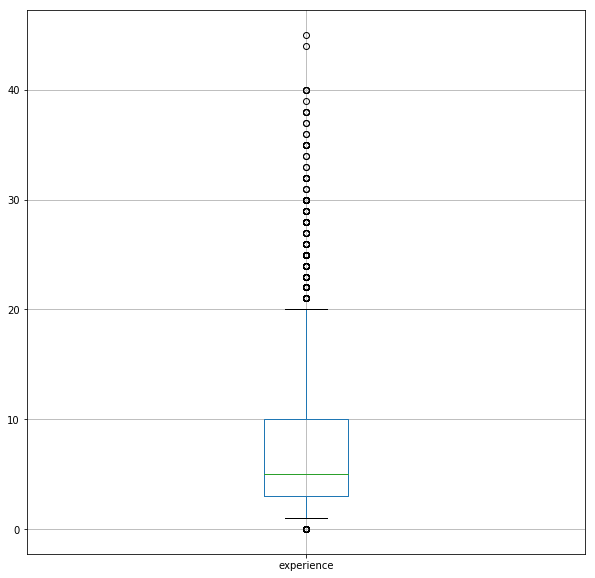

In [87]:
boxplot_viz("experience")

Comme on peut le voir sur le boxplot ci-dessus, des valeurs aberrantes sont présentes (0 année d'expérience) et d'autres extrêmes (+ de 40 années d'expérience) risquent de fausser les calculs.

In [88]:
df1 = df1[df1.experience > 0]
df1['experience'] = df1['experience'].apply(lambda x: 40 if x > 40 else x)

### 4. Gender

In [89]:
df1['gender'].value_counts()

Male                                                    3247
Not Asked                                               1840
Female                                                   442
Prefer not to say                                         37
Non-binary/third gender                                    9
Dragon                                                     1
Any human one                                              1
Attack helicopter                                          1
Attack Helicopter                                          1
This question is inappropriate.                            1
toad frog                                                  1
human  This is also my race.                               1
Meat Popsicle                                              1
mosquito                                                   1
Cyborg                                                     1
confused                                                   1
Vulcan                  

On constate que la série contient de nombreuses valeurs aberrantes, c'est à dire que le sexe renseigné est différent de 'Male', 'Female', 'Not Asked' ou 'Prefer not to say'

In [90]:
def gender_value(x):
    if x != 'Male' and x != 'Female':
        return "Unknow"
    else:
        return x

df1['gender'] = df1['gender'].apply(gender_value)

### 5. Hours per week

In [91]:
df1['hours_per_week'].value_counts()

40           1871
Not Asked    1153
45            977
50            703
42            185
55            129
60            107
35             72
48             49
44             48
38             44
43             39
41             26
37             23
65             23
46             22
30             19
36             17
47             14
70             12
80              7
32              5
52              5
90              4
75              4
53              4
20              3
39              2
24              2
85              2
25              2
68              2
58              2
22              1
12              1
15              1
8               1
57              1
28              1
100             1
82              1
64              1
150             1
59              1
49              1
6               1
Name: hours_per_week, dtype: int64

On constate de nombreuses valeurs aberrantes car représentant un nombre d'heures de travail trop important sur une semaine. De même, il pourrait être intéressant d'attribuer une nouvelle valeur pour les valeurs Not Asked.

In [92]:
df1['hours_per_week'] = df1['hours_per_week'].replace('Not Asked', 0)
mean = df1['hours_per_week'].median()
mean

40.0

Comme la valeur médiane semble tout à fait cohérente, nous décidons de remplacer l'ensemble des valeur Not Asked par celle-ci.

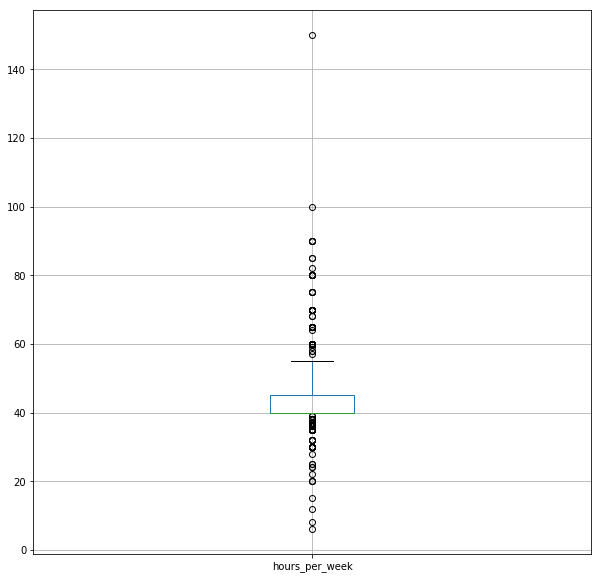

In [93]:
df1['hours_per_week'] = df1['hours_per_week'].replace(0, mean)
boxplot_viz("hours_per_week")

In [94]:
df1['hours_per_week'] = df1['hours_per_week'].apply(lambda x: 60 if x > 60 else 20 if x < 20 else x)

In [95]:
df1['company_employees'].value_counts()

Not Asked       4995
1000 or more     274
500-999           83
250-499           78
100-249           77
6-99              73
1-5               10
Name: company_employees, dtype: int64

## Value grouping

### 1. Job title

In [96]:
df1['job_title'].unique()

array(['DBA (Production Focus - build & troubleshoot servers, HA/DR)',
       'Developer: App code (C#, JS, etc)', 'Analyst',
       'DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)',
       'Developer: Business Intelligence (SSRS, PowerBI, etc)',
       'Engineer', 'Manager', 'Developer: T-SQL', 'Architect', 'Other',
       'Data Scientist',
       'DBA (Development Focus - tunes queries, indexes, does deployments)',
       'DBA', 'Analytics consultant', 'Systems Administrator',
       'Consultant', 'Database Specialist', 'Technician ',
       'DevOps, Sr Software Engineer DBA', 'Principal database engineer'],
      dtype=object)

On observe qu'une même fonction peut avoir plusieurs dénominations. On décide d'attribuer la même valeur lorsque les dénominations sont relativement proches. 

In [97]:
def job_title_value(x):
    if 'DBA' in x:
        return 'DBA'
    elif 'Developer' in x:
        return 'Developer'
    elif 'Consultant' in x:
        return 'Consultant'
    else:
        return x

df1['job_title'] = df1['job_title'].apply(job_title_value)

s = df1["job_title"].value_counts()
df1.loc[df1["job_title"].isin(s[(s < 5)].index), "job_title"] = "Other" # Apply 'Other' to all value with an occurence inferior to five

### 2. Team size

In [98]:
df1['team_size'].value_counts()

None           2252
1              1140
2               639
More than 5     543
3               493
4               316
5               207
Name: team_size, dtype: int64

In [99]:
df1['team_size'].replace("None", np.nan, inplace=True)
df1['team_size'] = df1['team_size'].apply(lambda x: 6 if x == 'More than 5' else 0 if np.isnan(x) else x) # Apply value 0 when original value is NaN

In [100]:
df1['salary'] = df1['salary'].astype('int64', copy=False) # Change float type to int

### 3. number of companies

In [101]:
df1['nb_companies'].value_counts()

Not Asked                                                             3842
1 (this is the only company where I've had this kind of position)      608
2 (I worked at another similar position elsewhere before this one)     519
3                                                                      312
4                                                                      122
6 or more                                                              101
5                                                                       86
Name: nb_companies, dtype: int64

In [102]:
df1["nb_companies"] = df1["nb_companies"].apply(lambda x: "1" if str(x).startswith('1') 
                                                else "2" if str(x).startswith('2')
                                                else "6" if str(x).startswith('6')
                                                else x)

## Results

In [103]:
df1.head()

,salary,location,postal_code,job_title,employment_status,manage_staff,experience,nb_companies,team_size,company_employees,hours_per_week,largest_city,sector,lf_job,career_plans,gender
0,115000,United States,00000,DBA,Full time employee,No,5,1,2,Not Asked,40,20K-99K (large town),Private business,Not Asked,"Stay with the same employer, same role",Male
1,100000,United States,00000,Developer,Full time employee,No,6,1,6,Not Asked,40,1M+ (metropolis),Private business,Not Asked,Prefer not to say,Male
3,70000,United States,94133,Analyst,Full time employee,No,3,1,2,Not Asked,40,1M+ (metropolis),Private business,Not Asked,Change both employers and roles,Male
4,110000,United States,95354,DBA,Full time employee,No,25,3,0,Not Asked,40,100K-299K (city),Non-profit,Not Asked,"Stay with the same employer, same role",Male
5,79500,United States,78727,Analyst,Full time employee,No,2,1,0,Not Asked,40,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male


In [104]:
df1.shape

(5590, 16)

In [105]:
df1.to_csv('salary_survey_cleaned.csv')

Maintenant que nous avons un jeu de données propres, nous pouvons réaliser la visualisation de ces données afin de mieux comprendre les facteurs qui influencent le salaire aux USA